# Identify Python Version

In [1]:
from platform import python_version

print(python_version())

3.9.12


# Import Libraries

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

plt.style.use('ggplot')

# Time Series
import math

from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

# Import File

In [3]:
# Define Path

path = '/Users/jeannine/Library/CloudStorage/OneDrive-Personal/Documents/WGU/D213 - Advanced Data Analytics/'

In [4]:
# Import file

time = 'medical_time_series.csv'


ts = pd.read_csv(path + time)
ts


,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888
...,...,...
726,727,15.722056
727,728,15.865822
728,729,15.708988
729,730,15.822867


In [5]:
# convert day to a datetime format

ts['Date']=(pd.date_range(start=datetime(2019,1,1),periods=ts.shape[0],freq='24H'))
ts.set_index('Date',inplace=True)
ts.dropna(inplace=True)

In [6]:
ts.drop(columns=['Day'],axis=1, inplace=True)
print(ts.shape)
ts

(731, 1)


,Revenue
Date,
2019-01-01,0.000000
2019-01-02,-0.292356
2019-01-03,-0.327772
2019-01-04,-0.339987
2019-01-05,-0.124888
...,...
2020-12-27,15.722056
2020-12-28,15.865822
2020-12-29,15.708988


In [7]:
ts.head(5)

,Revenue
Date,
2019-01-01,0.000000
2019-01-02,-0.292356
2019-01-03,-0.327772
2019-01-04,-0.339987
2019-01-05,-0.124888


In [8]:
ts.drop(index='2019-01-01',inplace=True)
print(ts.shape)

(730, 1)


In [9]:
#check datatype of index

ts.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=730, freq=None)

# Explore Data

In [10]:
# check for data types

ts.dtypes

Revenue    float64
dtype: object

In [11]:
ts.dropna(inplace=True)
ts.describe()

,Revenue
count,730.000000
mean,14.199032
std,6.944821
min,-4.423299
25%,11.131196
50%,15.964154
75%,19.296861
max,24.792249


In [12]:
# Check for rows with zero values

ts.isnull().sum()

Revenue    0
dtype: int64

In [13]:
# check for duplicates
ts_copy = ts.copy()

ts_copy['duplicate_check'] = ts_copy['Revenue'].duplicated(keep=False)
ts_copy.loc[ts_copy['duplicate_check']==True]

,Revenue,duplicate_check
Date,,


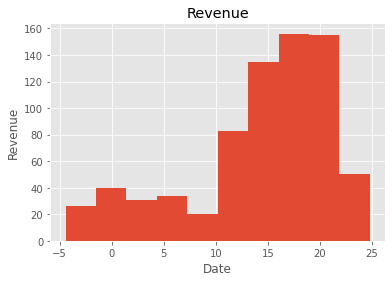

In [14]:
# Look at the shape of the data

ts.hist()
rcParams['figure.figsize'] = 12,7
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

Text(0, 0.5, 'Revenue in Millions')

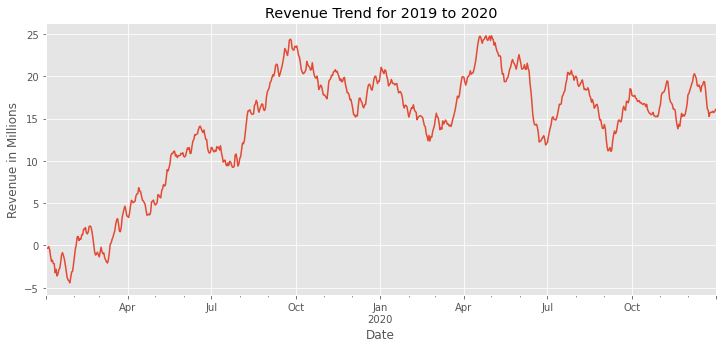

In [15]:
ts['Revenue'].plot(figsize=(12,5))
plt.title('Revenue Trend for 2019 to 2020')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')

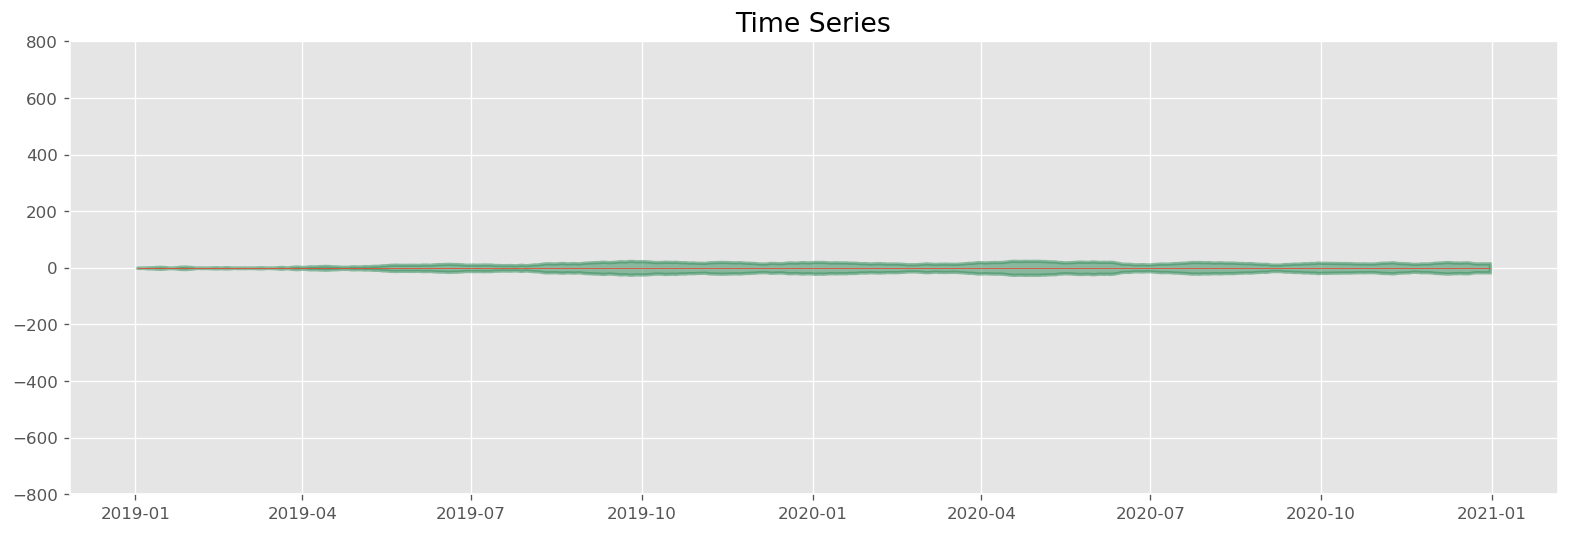

In [16]:
# Plot both sides of y to emphasize growth
#(https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
X = ts.index
y1 = ts['Revenue'].values
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(X, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Time Series', fontsize=16)
plt.hlines(y=0, xmin=np.min(ts.index), xmax=np.max(ts.index), linewidth=.5)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Revenue'>

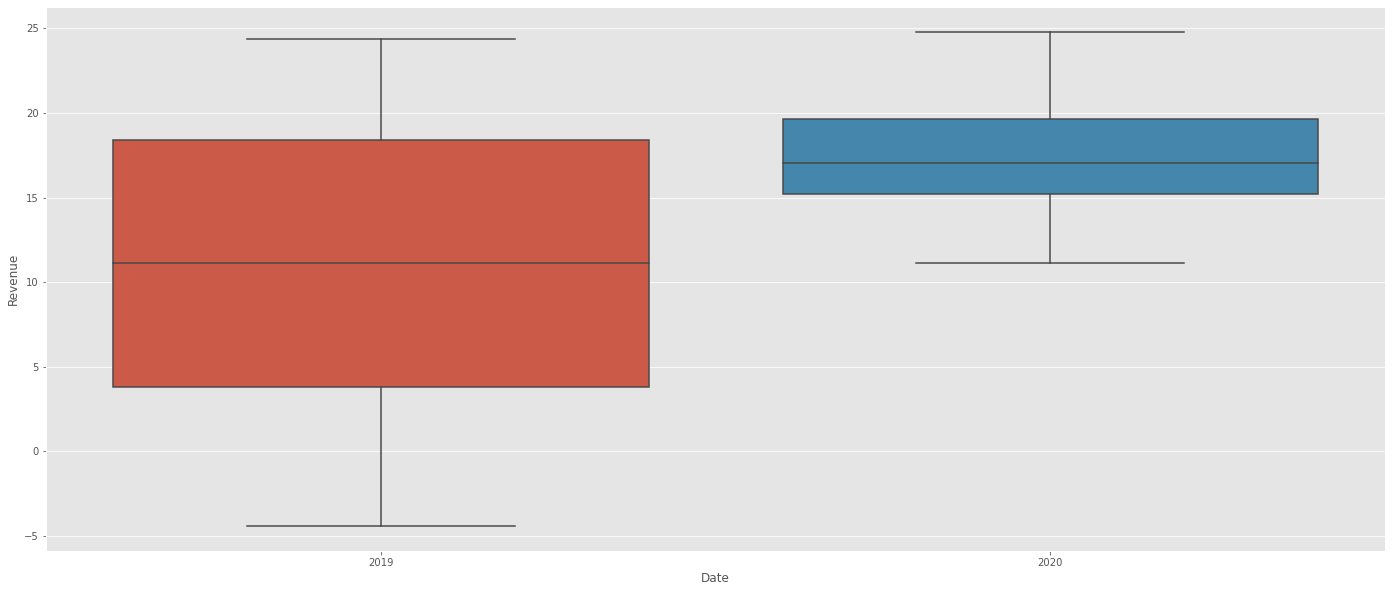

In [17]:

fig, ax = plt.subplots(figsize=(24,10))
sns.boxplot(x=ts.index.year, y=ts['Revenue'], ax=ax)

In [18]:
# Send Cleaned dataset to excel 

#ts.to_excel(path + 'JeannineCain - D213 cleaned dataset.xlsx')

# Create and Graph Rolling Mean and Rolling Standard Deviation

In [19]:
roll_avg = ts.rolling(window=30).mean()

roll_std = ts.rolling(window=30).std()


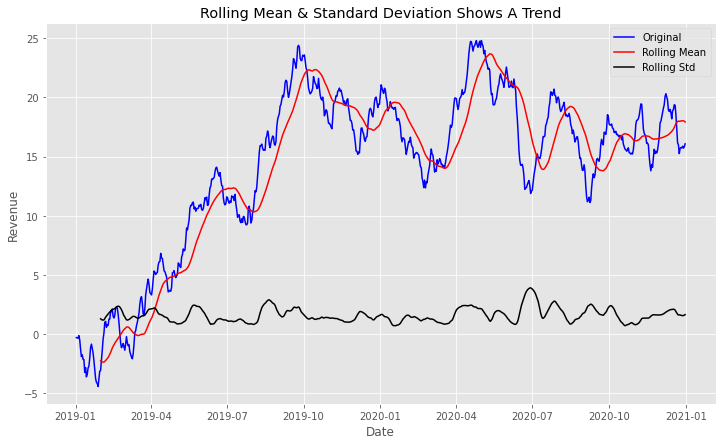

In [20]:
orig = plt.plot(ts, color='blue', label='Original')
mean = plt.plot(roll_avg, color='red', label='Rolling Mean')
std = plt.plot(roll_std, color='black', label='Rolling Std')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation Shows A Trend')

plt.show(block=False)

# Test for Stationarity

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.legend(loc='best')
    plt.title('Original, Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller test: ')
    dftest = adfuller(timeseries['Revenue'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'No. of Observations'])
    if dfoutput[1] <= 0.05:
        print("Reject the null hypothesis, the time series is stationary")
    else:
        print("Fail to reject the null hypothesis, the time series is non-stationary") 
   
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s) '%key] = value # Critical Values should always be 
                                                     # more than the test statistic          
    print(dfoutput)
    

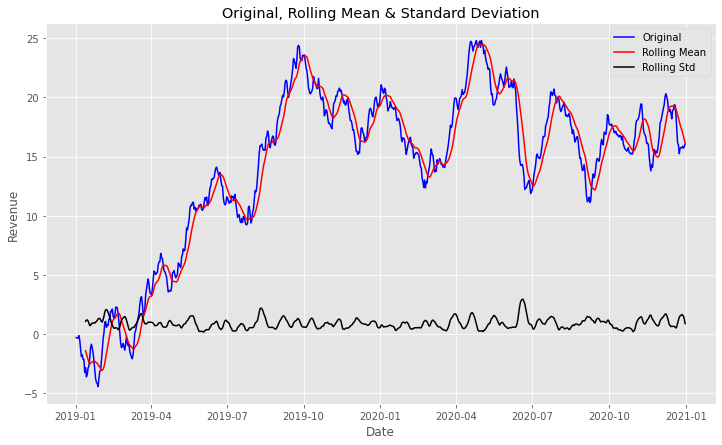

Results of Dickey-Fuller test: 
Fail to reject the null hypothesis, the time series is non-stationary
Test Statistic            -2.210771
p-value                    0.202360
#Lags Used                 1.000000
No. of Observations      728.000000
Critical Value (1%)       -3.439364
Critical Value (5%)       -2.865518
Critical Value (10%)      -2.568888
dtype: float64


In [22]:
test_stationarity(ts)

In [23]:
# Take difference of data
ts_diff = ts.diff(periods=1)
ts_diff.dropna(inplace=True)
ts_diff.head()

,Revenue
Date,
2019-01-03,-0.035416
2019-01-04,-0.012215
2019-01-05,0.215100
2019-01-06,-0.366702
2019-01-07,-0.763660


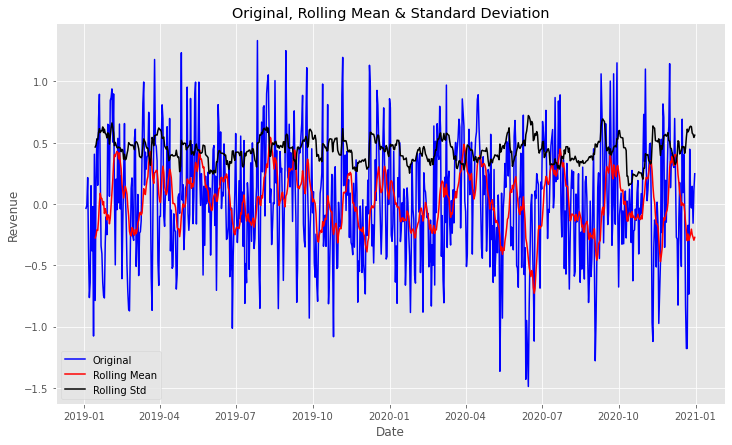

Results of Dickey-Fuller test: 
Reject the null hypothesis, the time series is stationary
Test Statistic          -1.735420e+01
p-value                  5.249586e-30
#Lags Used               0.000000e+00
No. of Observations      7.280000e+02
Critical Value (1%)     -3.439364e+00
Critical Value (5%)     -2.865518e+00
Critical Value (10%)    -2.568888e+00
dtype: float64


In [24]:
# test for seasonality
test_stationarity(ts_diff)

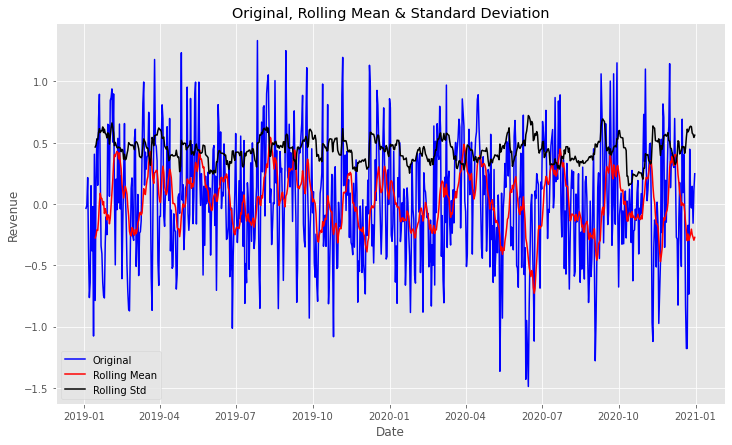

Results of Dickey-Fuller test: 
Reject the null hypothesis, the time series is stationary
Test Statistic          -1.735420e+01
p-value                  5.249586e-30
#Lags Used               0.000000e+00
No. of Observations      7.280000e+02
Critical Value (1%)     -3.439364e+00
Critical Value (5%)     -2.865518e+00
Critical Value (10%)    -2.568888e+00
dtype: float64


In [25]:
# test for seasonality
test_stationarity(ts_diff)

# Decomposing Data - Original, Trend, Seasonal, Residuals (noise)

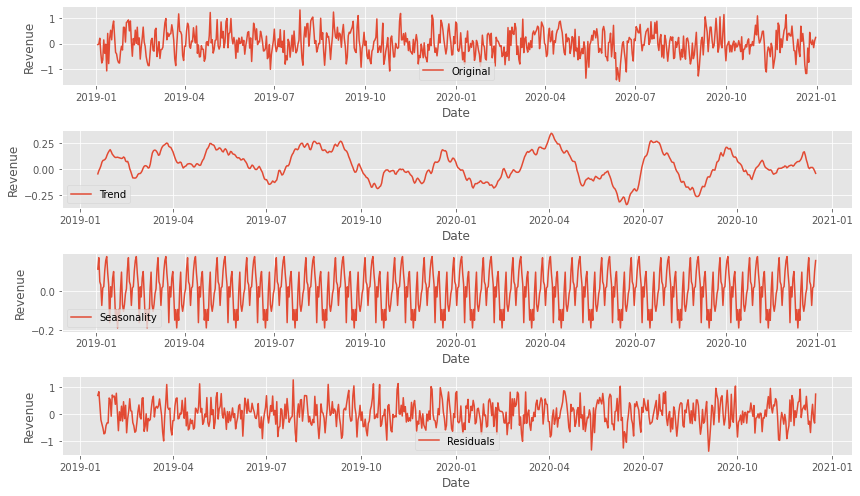

In [26]:
# ts_diff dataset

from statsmodels.tsa.seasonal import seasonal_decompose
ts_diff_decomposition = seasonal_decompose(ts_diff,period=30)
ts_diff_trend = ts_diff_decomposition.trend
ts_diff_seasonal = ts_diff_decomposition.seasonal
ts_diff_residual = ts_diff_decomposition.resid
plt.title('Decomposition Graph')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.subplot(411)
plt.plot(ts_diff, label='Original')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(ts_diff_trend, label='Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(ts_diff_seasonal, label='Seasonality')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_diff_residual,label='Residuals')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.tight_layout()


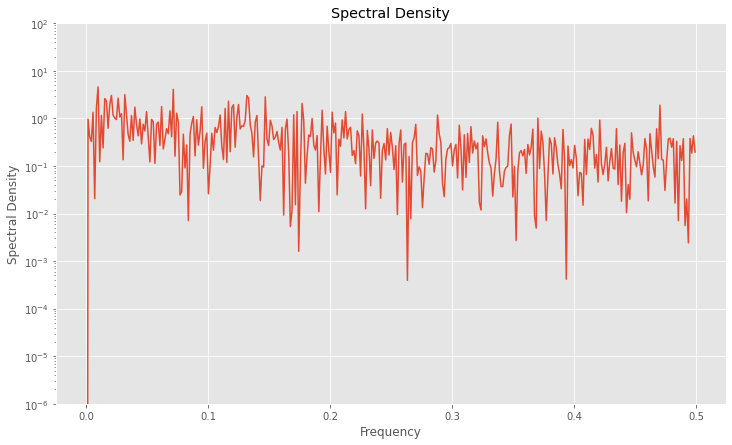

In [27]:
# Spectral Density ts_diff

from scipy import signal

f, Pxx_den = signal.periodogram(ts_diff['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim(1e-6,1e2)
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

# ACF and PACF

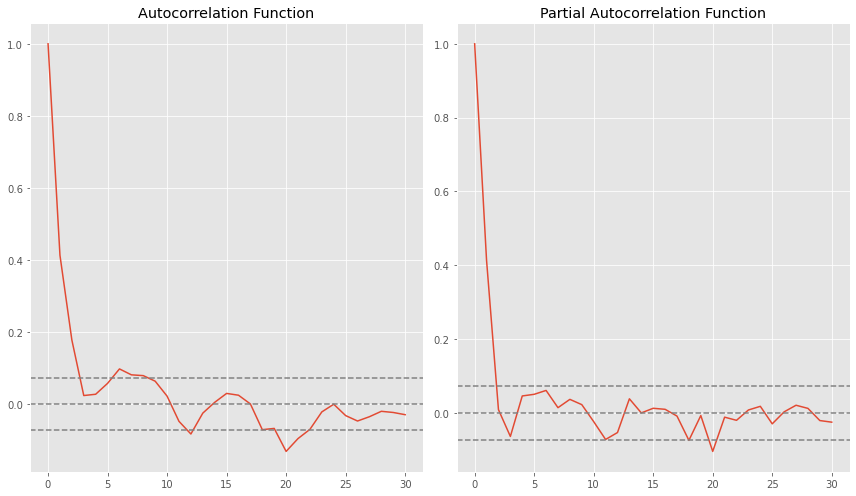

In [28]:
# acf and pacf to determine q and p of ts_diff dataset.

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=30)
lag_pacf = pacf(ts_diff, nlags=30, method='ols')

# plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Auto ARIMA

In [29]:
# find p, d, q for ts_diff dataset
# p (lag obs), 
# d (# differencing req'd for stationarity), 
# q (number of lagged forecast errors) values 
# first set of numbers - 
# second set of numbers indicate seasonality
# last set determine if there is any differencing

from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
stepwise_fit = auto_arima(ts_diff, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=882.726, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1015.163, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=880.725, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=905.489, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1014.728, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=882.666, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=882.679, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=882.775, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=879.385, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=881.314, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=881.330, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=904.505, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=881.407, Time=0.17 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.676 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  729
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -437.693
Date:                Wed, 23 Nov 2022   AIC                            879.385
Time:                        22:09:25   BIC                            888.568
Sample:                    01-03-2019   HQIC                           882.928
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.246      0.000       0.348       0.480
sigma2         0.1945      0.011     17.824      0.000       0.173       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.90   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

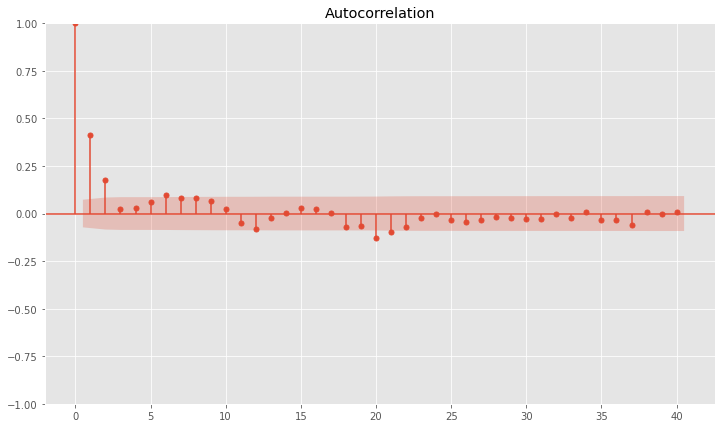

In [30]:
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(ts_diff, lags=40)
plt.show()

# Build Model using train/test datasets for Manual ARIMA Model (3,0,2)

In [31]:
# Split ts_diff dataset into test/train for model
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

print(ts_diff.shape)
train1 = ts_diff.iloc[:-30]
test1 = ts_diff.iloc[-30:]
print(train1.shape, test1.shape)

(729, 1)
(699, 1) (30, 1)


In [32]:
# Send train1/test1 datasets to excel 

train1.to_excel(path + 'JeannineCain - D213 cleaned dataset - train1.xlsx')
test1.to_excel(path + 'JeannineCain - D213 cleaned dataset - test1.xlsx')

Plotting ARIMA Model 1


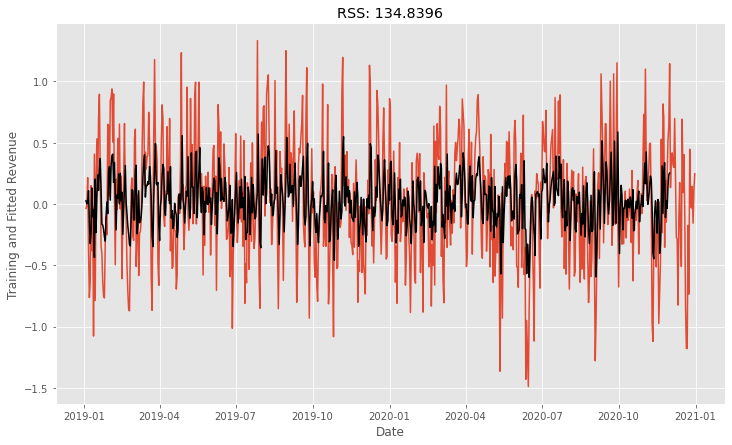

In [33]:
# Manual Model 1
model1 = ARIMA(train1['Revenue'], order=(3,0,2))
results1 = model1.fit()
plt.plot(ts_diff)
plt.plot(results1.fittedvalues, color='black')
plt.xlabel('Date')
plt.ylabel('Training and Fitted Revenue')
plt.title('RSS: %.4f'% sum((results1.fittedvalues-train1['Revenue'])**2))
print('Plotting ARIMA Model 1')

In [34]:
# Results 1 summary

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  699
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -416.811
Date:                Wed, 23 Nov 2022   AIC                            847.623
Time:                        22:09:26   BIC                            879.470
Sample:                    01-03-2019   HQIC                           859.935
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0267      0.027      0.975      0.330      -0.027       0.081
ar.L1          0.4379      0.283      1.547      0.122      -0.117       0.993
ar.L2         -0.6769      0.307     -2.206      0.027      -1.278      -0.075
ar.L3          0.2216      0.128      1.736      0.083      -0.029       0.472
ma.L1         -0.0211      0.274     -0.077      0.939      -0.558       0.516
ma.L2          0.6858      0.254      2.702      0.007       0.188       1.183
sigma2         0.1929      0.011     17.448      0.000       0.171       0.215
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.91   Prob(JB):                         0.48
Heteroskedasticity (H):               1.00   Skew:                            -0.03
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

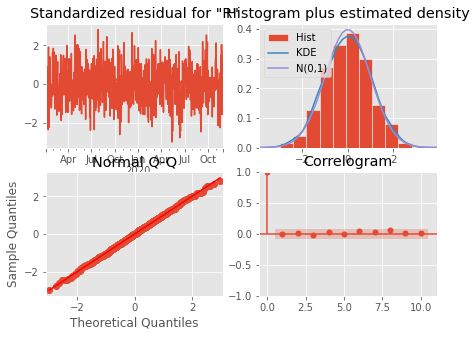

In [35]:
results1.plot_diagnostics(figsize=(7,5))
plt.show()

# Build Model2 using train/test datasets for Manual ARIMA Model (2,0,2)

Plotting ARIMA Model 2


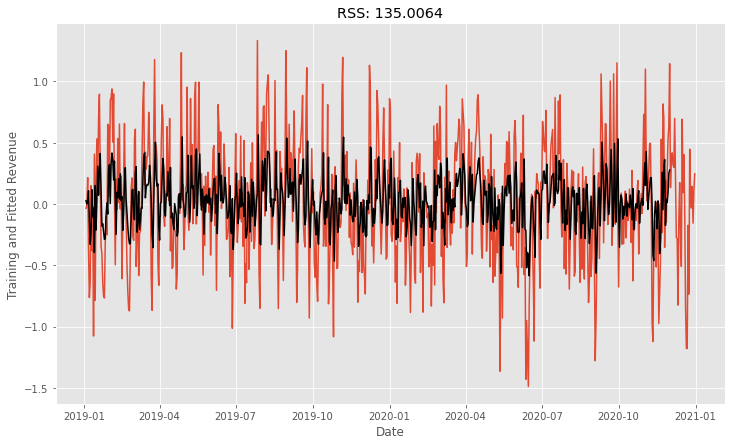

In [36]:
# Manual Model 2
model2 = ARIMA(train1['Revenue'], order=(2,0,2))
results2 = model2.fit()
plt.plot(ts_diff)
plt.plot(results2.fittedvalues, color='black')
plt.xlabel('Date')
plt.ylabel('Training and Fitted Revenue')
plt.title('RSS: %.4f'% sum((results2.fittedvalues-train1['Revenue'])**2))
print('Plotting ARIMA Model 2')

In [37]:
# Results 2 summary

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  699
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -417.245
Date:                Wed, 23 Nov 2022   AIC                            846.489
Time:                        22:09:27   BIC                            873.787
Sample:                    01-03-2019   HQIC                           857.042
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0267      0.027      0.980      0.327      -0.027       0.080
ar.L1          0.1014      0.450      0.225      0.822      -0.781       0.984
ar.L2         -0.0187      0.227     -0.082      0.934      -0.463       0.425
ma.L1          0.3123      0.450      0.694      0.488      -0.570       1.194
ma.L2          0.1780      0.090      1.969      0.049       0.001       0.355
sigma2         0.1931      0.011     17.479      0.000       0.171       0.215
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.99   Prob(JB):                         0.43
Heteroskedasticity (H):               1.01   Skew:                            -0.04
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

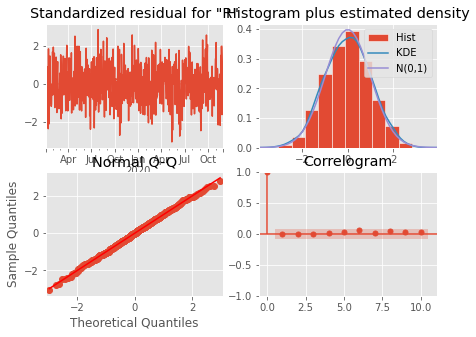

In [38]:
results2.plot_diagnostics(figsize=(7,5))
plt.show()

# Build Model using train/test datasets for Auto ARIMA Model (1,0,0)

Plotting ARIMA Auto ARIMA Model


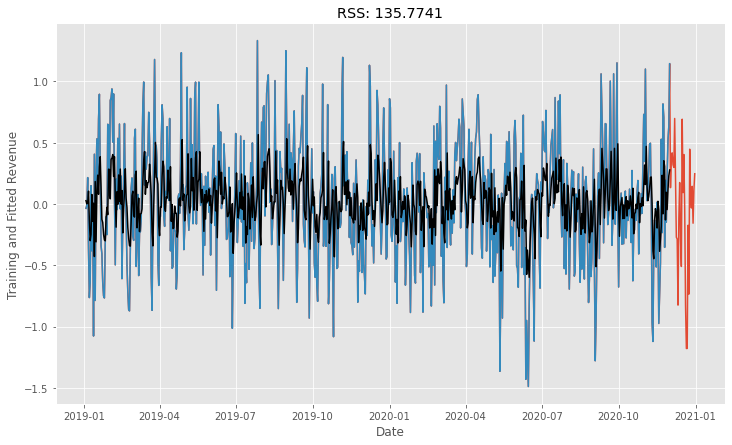

In [39]:
# AR Model
model_AUTO_AR = ARIMA(train1['Revenue'], order=(1,0,0))
results_AUTO_AR = model_AUTO_AR.fit()
plt.plot(ts_diff['Revenue'],label=True)
plt.plot(train1['Revenue'])
plt.plot(results_AUTO_AR.fittedvalues, color='black')
plt.xlabel('Date')
plt.ylabel('Training and Fitted Revenue')
plt.title('RSS: %.4f'% sum((results_AUTO_AR.fittedvalues-train1['Revenue'])**2))
print('Plotting ARIMA Auto ARIMA Model')

In [40]:
# Results Final model summary

results_AUTO_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  699
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -419.218
Date:                Wed, 23 Nov 2022   AIC                            844.437
Time:                        22:09:28   BIC                            858.086
Sample:                    01-03-2019   HQIC                           849.713
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0270      0.028      0.949      0.342      -0.029       0.083
ar.L1          0.4126      0.035     11.770      0.000       0.344       0.481
sigma2         0.1942      0.011     17.532      0.000       0.173       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.98   Prob(JB):                         0.43
Heteroskedasticity (H):               0.99   Skew:                            -0.02
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

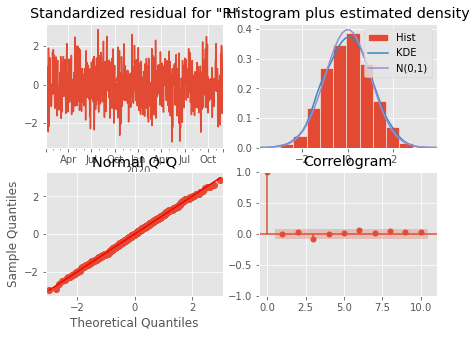

In [41]:
results_AUTO_AR.plot_diagnostics(figsize=(7,5))
plt.show()

In [42]:
print(test1.head(1))
print(test1.tail(1))

             Revenue
Date                
2020-12-02  0.133058
             Revenue
Date                
2020-12-31  0.246562


2019-02-02    0.364462
2019-02-03    0.373774
2019-02-04    0.403191
2019-02-05    0.224117
2019-02-06    0.386360
                ...   
2020-11-27    0.095379
2020-11-28   -0.045588
2020-11-29    0.114410
2020-11-30    0.230162
2020-12-01    0.277301
Freq: D, Name: predicted_mean, Length: 669, dtype: float64


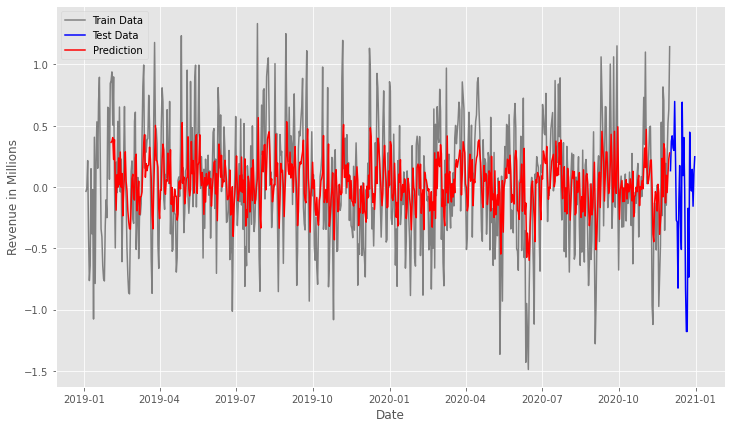

In [43]:
#plot prediction on test data

test_pred = results_AUTO_AR.predict(start=len(test1['Revenue']), typ='levels')
print(test_pred)
plt.plot(train1['Revenue'], color='grey', label='Train Data')
plt.plot(test1['Revenue'], color='blue', label='Test Data')
plt.plot(test_pred, color='red', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.legend()

             Revenue
Date                
2019-01-03 -0.035416
             Revenue
Date                
2020-12-02  0.133058
DatetimeIndex(['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='D')
2020-12-02    0.488082
2020-12-03    0.217241
2020-12-04    0.105490
2020-12-05    0.059381
2020-12-06    0.040356
2020-12-07    0.032506
2020-12-08    0.029267
2020-12-09    0.027931
2020-12-10    0.027379
2020-12-11    0.027152
2020-12-12    0.027058
2020-12-13    0.02

<AxesSubplot:xlabel='Date'>

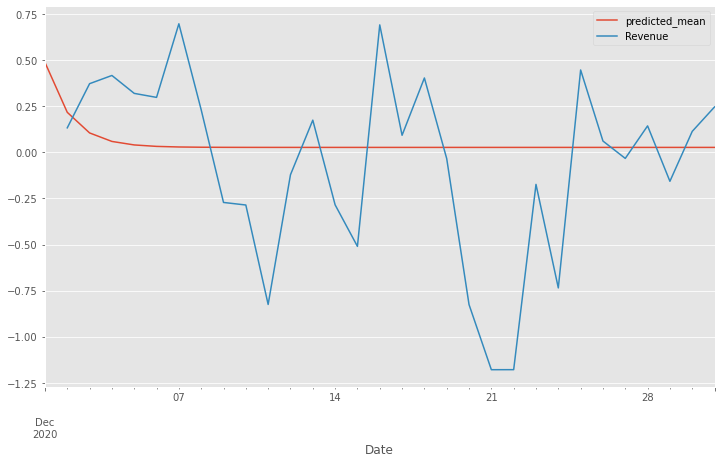

In [44]:
# prediction on test data


model = ARIMA(train1['Revenue'],order=(1,0,0))
results = model.fit()

start = len(train1['Revenue'])
end = len(train1['Revenue']) + len(test1['Revenue'])
print(train1.head(1))
print(test1.head(1))
index_future_dates = pd.date_range(start='2020-12-1', end = '2020-12-31')
print(index_future_dates)

res_pred = results.predict(start=start, end=end, typ='levels')
print(res_pred)

res_pred.index = index_future_dates

res_pred.plot(legend=True)
#ts['Revenue'].plot(legend=True)
test1['Revenue'].plot(legend=True)



             Revenue
Date                
2019-01-03 -0.035416
             Revenue
Date                
2020-12-02  0.133058
2020-12-02    0.488082
2020-12-03    0.217241
2020-12-04    0.105490
2020-12-05    0.059381
2020-12-06    0.040356
2020-12-07    0.032506
2020-12-08    0.029267
2020-12-09    0.027931
2020-12-10    0.027379
2020-12-11    0.027152
2020-12-12    0.027058
2020-12-13    0.027019
2020-12-14    0.027003
2020-12-15    0.026997
2020-12-16    0.026994
2020-12-17    0.026993
2020-12-18    0.026992
2020-12-19    0.026992
2020-12-20    0.026992
2020-12-21    0.026992
2020-12-22    0.026992
2020-12-23    0.026992
2020-12-24    0.026992
2020-12-25    0.026992
2020-12-26    0.026992
2020-12-27    0.026992
2020-12-28    0.026992
2020-12-29    0.026992
2020-12-30    0.026992
2020-12-31    0.026992
Freq: D, Name: predicted_mean, dtype: float64


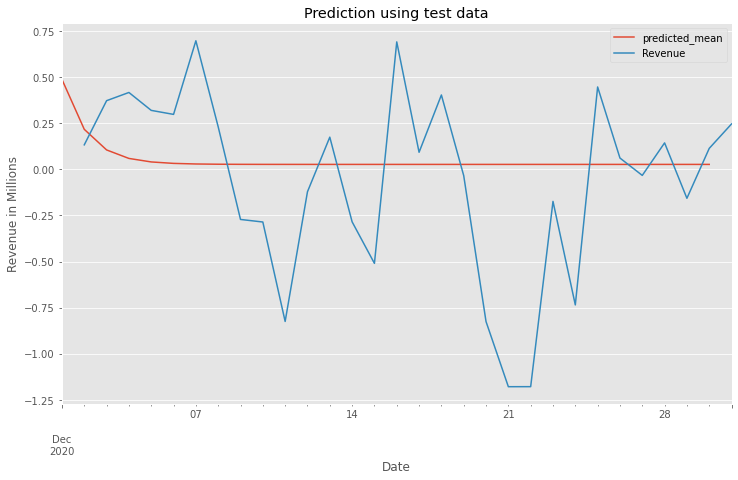

In [45]:

start = len(train1)
end = len(train1) + len(test1)- 1
print(train1.head(1))
print(test1.head(1))

res_pred2 = results.predict(start=start, end=end, typ='levels')
print(res_pred2)

res_pred2.index = ts.index[start:end+1]

res_pred2.plot(legend=True)
test1['Revenue'].plot(legend=True)

plt.title('Prediction using test data')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.show()

# Final Model For Prediction

Plotting Final ARIMA Model


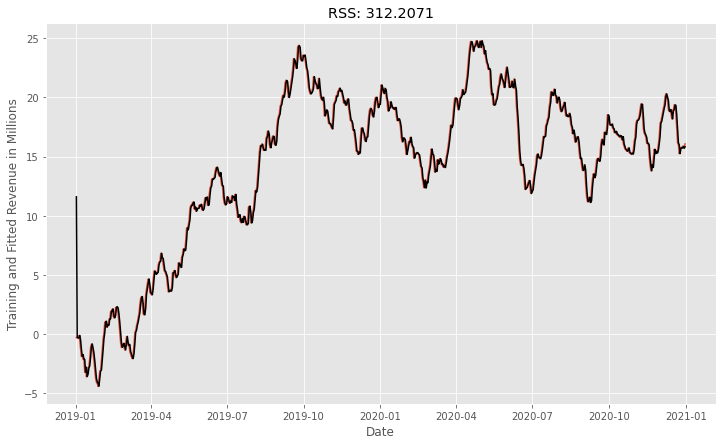

In [46]:
# Final model prediction
final_model = ARIMA(ts['Revenue'], order=(1,0,0))
final_results = final_model.fit()
plt.plot(ts['Revenue'])
plt.plot(final_results.fittedvalues, color='black')
plt.title('RSS: %.4f'% sum((final_results.fittedvalues-ts['Revenue'])**2))
plt.xlabel('Date')
plt.ylabel('Training and Fitted Revenue in Millions')
print('Plotting Final ARIMA Model')

In [47]:
# Predict Orignial Model

final_pred=final_results.predict(start='2019-01-02', end='2020-12-31', typ='levels').rename('ARIMA Predictions')
print(final_pred)



2019-01-02    11.596610
2019-01-03    -0.273095
2019-01-04    -0.308454
2019-01-05    -0.320650
2019-01-06    -0.105899
                ...    
2020-12-27    15.748012
2020-12-28    15.715373
2020-12-29    15.858905
2020-12-30    15.702326
2020-12-31    15.816021
Freq: D, Name: ARIMA Predictions, Length: 730, dtype: float64


<AxesSubplot:xlabel='Date', ylabel='Training and Fitted Revenue'>

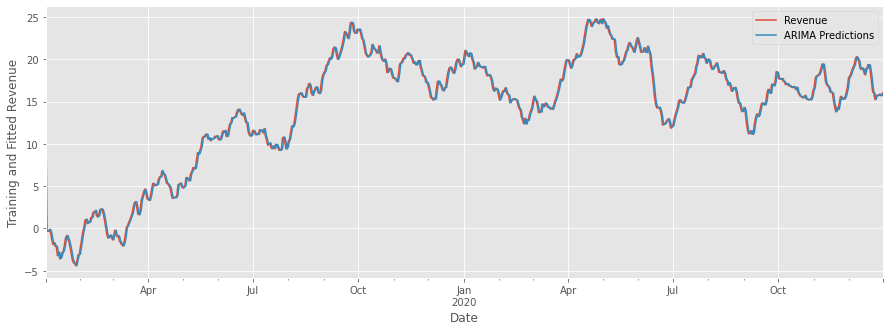

In [48]:
ts['Revenue'].plot(legend=True)
plt.xlabel('Date')
plt.ylabel('Training and Fitted Revenue')
final_pred.plot(legend=True,figsize=(15,5))


# Validate Final Model using RMSE

In [49]:
ts['Revenue'].mean()

14.199032419860282

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(final_pred,ts['Revenue']))
print(rmse)

0.6539732602145701


# Look at model residual errors 

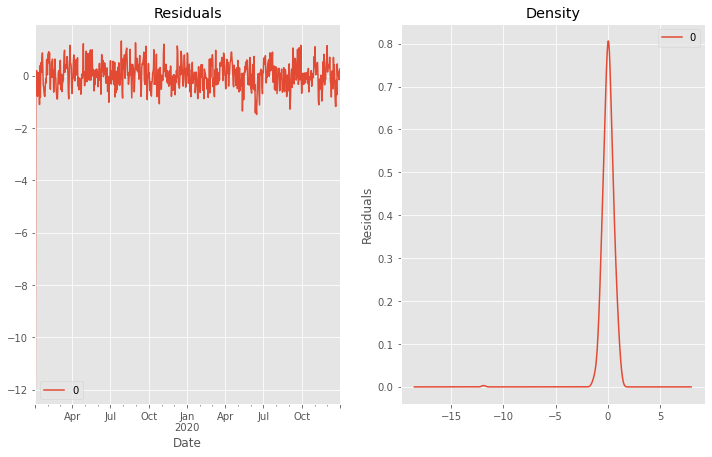

In [51]:
# Model 1
residuals = pd.DataFrame(final_results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.ylabel('Residuals')
plt.show()

# Predict Next 90 days

In [52]:
# Get last data in test1 dataset
ts.tail()

,Revenue
Date,
2020-12-27,15.722056
2020-12-28,15.865822
2020-12-29,15.708988
2020-12-30,15.822867
2020-12-31,16.069429


In [53]:
# Predict next 90 days ts_results

model_90 = ARIMA(ts['Revenue'], order=(1,0,0))
results_90 = model_90.fit()
index_future_dates = pd.date_range(start='2020-12-30', end = '2021-03-31')
print(index_future_dates)
pred_90=results_90.predict(start=len(ts['Revenue']), 
                        end=len(ts['Revenue'])+91, 
                        typ='levels').rename('ARIMA Predictions')
print(pred_90)
pred_90.index=index_future_dates

DatetimeIndex(['2020-12-30', '2020-12-31', '2021-01-01', '2021-01-02',
               '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10',
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-16', '2021-01-17', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26',
               '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30',
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
               '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11',
               '2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23',
      

In [54]:
#print(pred_90)
final_ts = pd.Series(results_90.fittedvalues)
final_ts

Date
2019-01-02    11.596610
2019-01-03    -0.273095
2019-01-04    -0.308454
2019-01-05    -0.320650
2019-01-06    -0.105899
                ...    
2020-12-27    15.748012
2020-12-28    15.715373
2020-12-29    15.858905
2020-12-30    15.702326
2020-12-31    15.816021
Length: 730, dtype: float64

# Plot the prediction

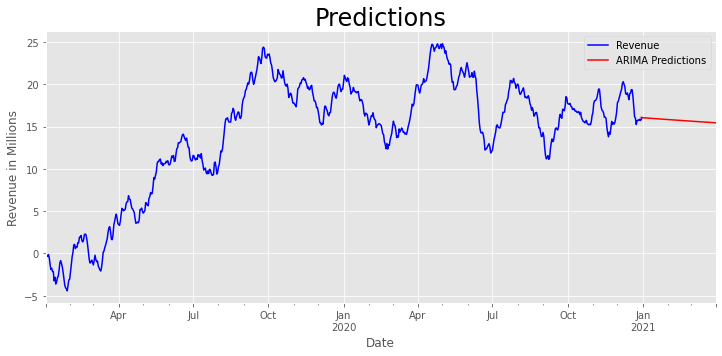

In [55]:
ts['Revenue'].plot(figsize=(12,5),color='blue')
pred_90.plot(color='red')
plt.title('Predictions', size=24)
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.legend()
plt.show()

# Forecast with Confidence Interval + 90 days 

In [56]:
model_AUTO_AR = ARIMA(ts['Revenue'], order=(1,0,0))
results_AUTO_AR = model_AUTO_AR.fit()

prediction = results_90.get_forecast(steps=90)
#prediction
mean_prediction = prediction.predicted_mean
#mean_prediction
confidence_intervals = prediction.conf_int() 
#confidence_intervals
lower_limits = confidence_intervals.loc[:,'lower Revenue']
upper_limits = confidence_intervals.loc[:,'upper Revenue']
#print(lower_limits, upper_limits)

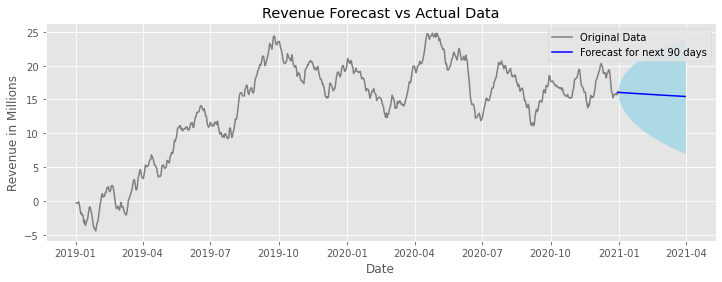

In [57]:
plt.figure(figsize=(12,4))
#plt.plot(train1.index,train1['Revenue'], label ='Training Data', color='lightgray')
plt.plot(ts.index, ts['Revenue'], label='Original Data', color='grey')
plt.plot(pred_90.index,pred_90, label ='Forecast for next 90 days', color='blue')
#plt.plot(mean_prediction.index, mean_prediction, color='red', label = 'mean forecast')
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='lightblue')
plt.title('Revenue Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.legend()
plt.show()

# Forecast without Confidence Interval + 90 days 

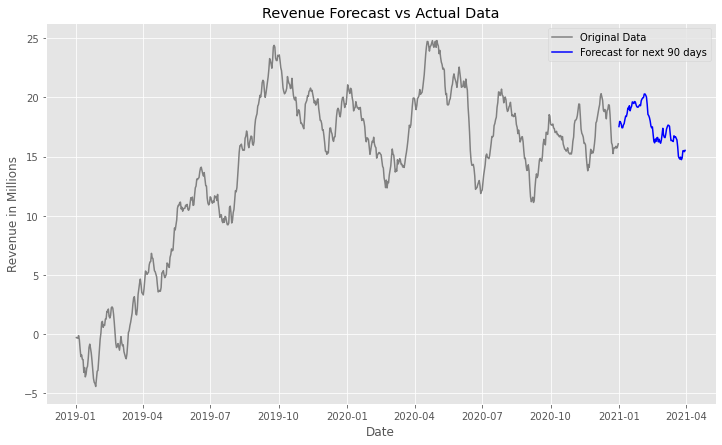

In [58]:
from statsmodels.tsa.forecasting.stl import STLForecast

from statsmodels.tsa.arima.model import ARIMA

 
stlf = STLForecast(ts['Revenue'], ARIMA, model_kwargs={"order": (1, 0, 0)},period=90)
stlf_res = stlf.fit()

forecast = stlf_res.forecast(90)
plt.plot(ts['Revenue'], label='Original Data', color='grey')
plt.plot(forecast, label ='Forecast for next 90 days', color='blue')
plt.title('Revenue Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.legend()
#plt.plot(forecast)
plt.show()